# 📶 FFT layers

`serket` has `FFT` variant for the convolution layers, the folllowing code example compares the normal convolution based on `jax.lax.general_conv_...` and `serket` based `FFT` variant for varying kernel size

94.6 ms ± 7.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.1 ms ± 915 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.8 ms ± 6.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
31.7 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
196 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
54.3 ms ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
102 ms ± 9.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
64.8 ms ± 5.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
137 ms ± 5.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
230 ms ± 8.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
404 ms ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.38 s ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
318 ms ± 8.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.54 s ± 81.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


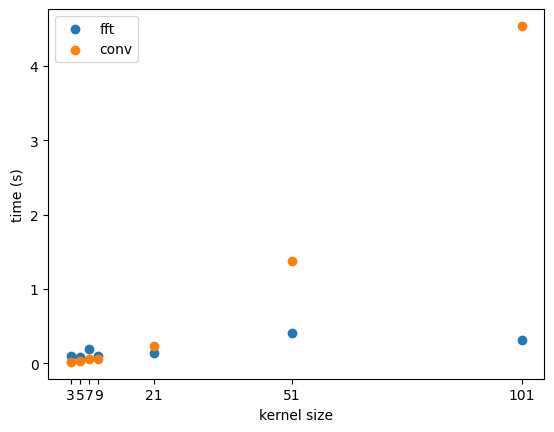

In [29]:
import serket as sk 
import jax
import numpy.testing as npt
import matplotlib.pyplot as plt

x = jax.numpy.ones([10, 3, 128, 128], dtype=jax.numpy.float32)

fft_times = {}
conv_times = {}

for kernel_size in [3,5, 7, 9, 21, 51, 101]:

    @jax.jit
    def fftconv(x):
        return sk.nn.FFTConv2D(3, 64, kernel_size)(x)
    
    @jax.jit
    def conv(x):
        return sk.nn.Conv2D(3, 64, kernel_size)(x)
    
    npt.assert_allclose(jax.vmap(fftconv)(x), jax.vmap(conv)(x), atol=1e-5)

    fft_times[kernel_size] = %timeit -o jax.vmap(fftconv)(x)
    conv_times[kernel_size] = %timeit -o jax.vmap(conv)(x)


# construct the timing results

k,t = zip(*fft_times.items())
t = [t.average for t in t]

plt.scatter(k,t , label='fft')

k,t = zip(*conv_times.items())
t = [t.average for t in t]

plt.scatter(k,t , label='conv')
plt.xticks(k)
plt.xlabel('kernel size')
plt.ylabel('time (s)')
plt.legend()